<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

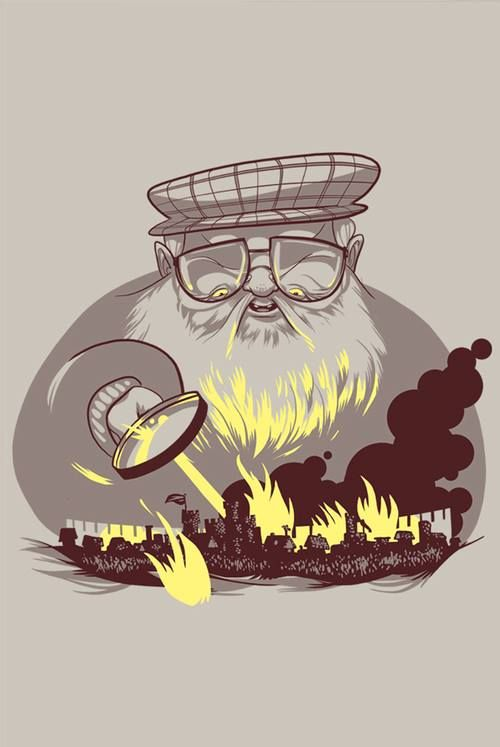

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 70.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 82.9MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [417]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [418]:
data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [419]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [420]:
data.drop(columns=[
    'mother', 'father', 'heir', 'spouse', 'name', 'house', 
    'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'title'
], inplace=True)
data.head()

,male,culture,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,
1,1,NaN,NaN,0,0,0,0,0,0,0,NaN,11,0.605351,0
2,1,Rivermen,208.0,1,1,1,1,1,1,1,97.0,1,0.896321,1
3,1,NaN,NaN,0,0,0,1,0,0,1,NaN,0,0.267559,1
4,0,NaN,82.0,0,0,0,0,0,1,1,23.0,0,0.183946,0
5,0,Dornish,276.0,0,0,0,1,0,1,1,29.0,0,0.043478,1


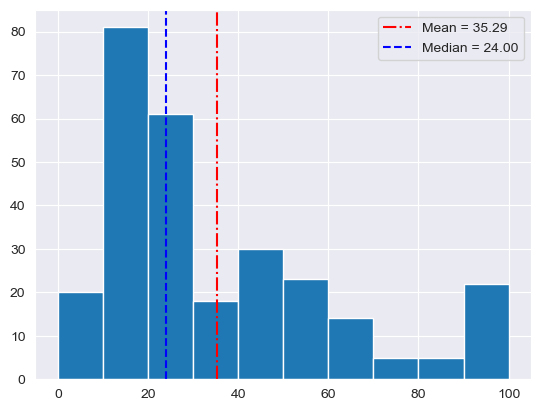

In [421]:
plt.hist(data.age)
plt.axvline(data.age.mean(), color='r', linestyle='-.', label=f'Mean = {data.age.mean():.2f}')
plt.axvline(data.age.median(), color='b', linestyle='--', label=f'Median = {data.age.median():.2f}')
plt.legend()

In [422]:
data.age = data.age.fillna(data.age.mean())

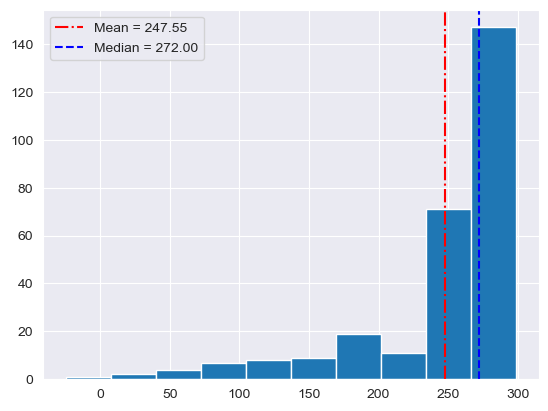

In [423]:
plt.hist(data.dateOfBirth)
plt.axvline(data.dateOfBirth.mean(), color='r', linestyle='-.', label=f'Mean = {data.dateOfBirth.mean():.2f}')
plt.axvline(data.dateOfBirth.median(), color='b', linestyle='--', label=f'Median = {data.dateOfBirth.median():.2f}')
plt.legend()

In [424]:
data.dateOfBirth = data.dateOfBirth.fillna(data.age.mean())

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [425]:
data['isPopular'] = data.popularity.map(lambda x: 1 if x > 0.5 else 0)

In [426]:
data['boolDeadRelations'] = data.numDeadRelations.map(lambda x: 1 if x > 0 else 0)

In [427]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen']
}

invert_cult = {item: key for key, items in cult.items() for item in items}
data.culture = data.culture.str.lower().map(invert_cult)
data = data.fillna('Other')

In [428]:
data.head()

,male,culture,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,
1,1,Other,35.290323,0,0,0,0,0,0,0,35.290323,11,0.605351,0,1,1
2,1,Other,208.000000,1,1,1,1,1,1,1,97.000000,1,0.896321,1,1,1
3,1,Other,35.290323,0,0,0,1,0,0,1,35.290323,0,0.267559,1,0,0
4,0,Other,82.000000,0,0,0,0,0,1,1,23.000000,0,0.183946,0,0,0
5,0,Dornish,276.000000,0,0,0,1,0,1,1,29.000000,0,0.043478,1,0,0


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [429]:
data.drop(columns=['numDeadRelations', 'popularity'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   male               1557 non-null   int64  
 1   culture            1557 non-null   object 
 2   dateOfBirth        1557 non-null   float64
 3   book1              1557 non-null   int64  
 4   book2              1557 non-null   int64  
 5   book3              1557 non-null   int64  
 6   book4              1557 non-null   int64  
 7   book5              1557 non-null   int64  
 8   isMarried          1557 non-null   int64  
 9   isNoble            1557 non-null   int64  
 10  age                1557 non-null   float64
 11  isAlive            1557 non-null   int64  
 12  isPopular          1557 non-null   int64  
 13  boolDeadRelations  1557 non-null   int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 182.5+ KB


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

<BarContainer object of 2 artists>

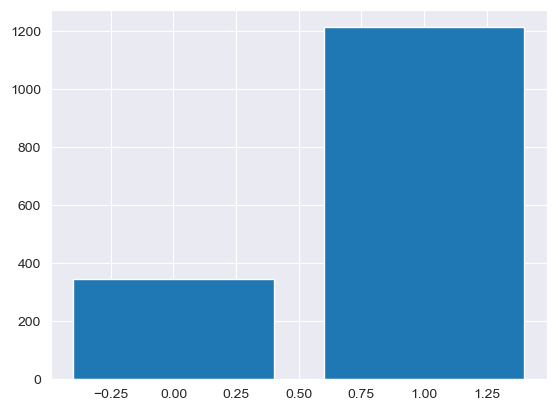

In [430]:
target = data.isAlive.value_counts()
plt.bar(target.index, target.values)

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [431]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data.age = scaler.fit_transform(data[['age']])
data.dateOfBirth = scaler.fit_transform(data[['dateOfBirth']])

<Axes: >

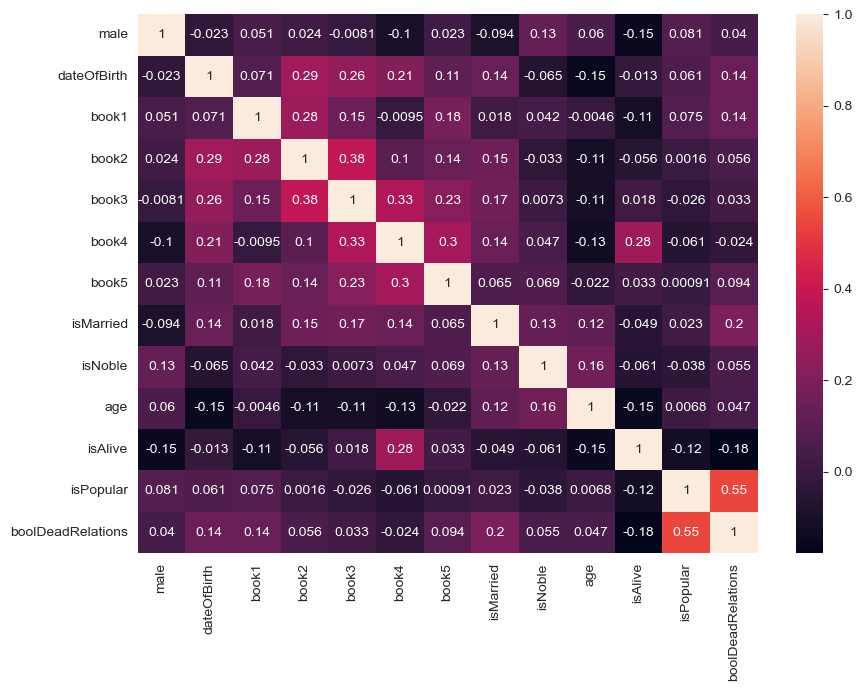

In [432]:
numerical_features = data.select_dtypes(exclude=['object'])
plt.figure(figsize=(10, 7))
sns.heatmap(numerical_features.corr(), annot=True)

In [433]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
categorical_features = data.select_dtypes(include='object')
one_hot_encoded = encoder.fit_transform(categorical_features).toarray()
one_hot_data = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_features.columns))
one_hot_data.head()

,culture_Andal,culture_Braavosi,culture_Dornish,culture_Free Folk,culture_Ghiscari,culture_Lysene,culture_Myrish,culture_Northmen,culture_Norvoshi,culture_Other,culture_Qartheen,culture_Reach,culture_Stormlander,culture_Summer Islands,culture_Westermen,culture_Westerosi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [434]:
numerical_features.reset_index(drop=True, inplace=True)
one_hot_data.reset_index(drop=True, inplace=True)
new_data = pd.concat([numerical_features, one_hot_data], axis=1)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557 entries, 0 to 1556
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   male                    1557 non-null   int64  
 1   dateOfBirth             1557 non-null   float64
 2   book1                   1557 non-null   int64  
 3   book2                   1557 non-null   int64  
 4   book3                   1557 non-null   int64  
 5   book4                   1557 non-null   int64  
 6   book5                   1557 non-null   int64  
 7   isMarried               1557 non-null   int64  
 8   isNoble                 1557 non-null   int64  
 9   age                     1557 non-null   float64
 10  isAlive                 1557 non-null   int64  
 11  isPopular               1557 non-null   int64  
 12  boolDeadRelations       1557 non-null   int64  
 13  culture_Andal           1557 non-null   float64
 14  culture_Braavosi        1557 non-null   

**Задание 1.8.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [435]:
X = new_data.drop(columns=['isAlive']).values
y = new_data.isAlive.values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [436]:
from sklearn.model_selection import train_test_split

In [437]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


Импортируйте модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [438]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

In [439]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

models_and_params = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'C': np.arange(1, 50),
            'solver': ['lbfgs', 'liblinear']
        }
    },
    'AdaBoostClassifier': {
        'model': AdaBoostClassifier(algorithm='SAMME'),
        'params': {
            'n_estimators': np.arange(50, 200, 50),
            'learning_rate': np.arange(0.1, 2)
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': np.arange(50, 200, 50),
            'max_depth': np.arange(1, 15),
            'min_samples_split': np.arange(1, 10)
        }
    },
    'GaussianProcessClassifier': {
        'model': GaussianProcessClassifier(),
        'params': {
            'max_iter_predict': [100, 200]
        }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': np.arange(2, 20),
            'weights': ['uniform', 'distance']
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': np.arange(1, 500),
            'min_samples_split': np.arange(1, 50)
        }
    }
}

best_models = {}

for model_name, mp in models_and_params.items():
    print(f"GridSearch для модели {model_name}...")
    grid = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[model_name] = grid.best_estimator_
    print(f"Лучшая точность: {grid.best_score_:.4f}")
    print(f"Лучшие параметры: {grid.best_params_}\n")


GridSearch для модели LogisticRegression...
Лучшая точность: 0.7925
Лучшие параметры: {'C': 5, 'solver': 'lbfgs'}

GridSearch для модели AdaBoostClassifier...
Лучшая точность: 0.8086
Лучшие параметры: {'learning_rate': 1.1, 'n_estimators': 150}

GridSearch для модели RandomForestClassifier...


/Users/mr_1necs/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
210 fits failed out of a total of 1890.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mr_1necs/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mr_1necs/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/mr_1necs/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constrai

Лучшая точность: 0.8214
Лучшие параметры: {'max_depth': 11, 'min_samples_split': 8, 'n_estimators': 150}

GridSearch для модели GaussianProcessClassifier...
Лучшая точность: 0.8137
Лучшие параметры: {'max_iter_predict': 100}

GridSearch для модели KNeighborsClassifier...
Лучшая точность: 0.8067
Лучшие параметры: {'n_neighbors': 19, 'weights': 'uniform'}

GridSearch для модели DecisionTreeClassifier...
Лучшая точность: 0.8150
Лучшие параметры: {'max_depth': 7, 'min_samples_split': 5}



/Users/mr_1necs/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
2495 fits failed out of a total of 122255.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2495 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mr_1necs/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mr_1necs/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/mr_1necs/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_cons

Обучим модель `LogisticRegression`

In [440]:
logistic_regression = LogisticRegression(C = 5, solver = 'lbfgs')

logistic_regression.fit(X_train, y_train)

y_pred_lr = logistic_regression.predict(X_test)

Обучим модель `AdaBoostClassifier`

In [441]:
ada_classifier = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 1.1, n_estimators = 150)

ada_classifier.fit(X_train, y_train)
, 
y_pred_ada = ada_classifier.predict(X_test)

Обучим модель `RandomForestClassifier`

In [442]:
random_forest = RandomForestClassifier(max_depth = 11, min_samples_split = 8, n_estimators = 150)

random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

Обучим модель `GaussianProcessClassifier`

In [443]:
gaussian_process = GaussianProcessClassifier(max_iter_predict = 100)

gaussian_process.fit(X_train, y_train)

y_pred_gp = gaussian_process.predict(X_test)

Обучим модель `KNeighborsClassifier`

In [444]:
knn = KNeighborsClassifier(n_neighbors = 19, weights = 'uniform')

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

Обучим модель `DecisionTreeClassifier`

In [445]:
decision_tree = DecisionTreeClassifier(max_depth = 7, min_samples_split = 5)

decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [446]:
from sklearn.metrics import accuracy_score

Посчитаем метрику accuracy для всех

In [447]:
accuracy_ada = accuracy_score(y_test, y_pred_ada)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gp = accuracy_score(y_test, y_pred_gp)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [448]:
print("LogisticRegression Accuracy : %.4f" % accuracy_lr)
print("AdaBoostClassifier Accuracy : %.4f" % accuracy_ada)
print("RandomForestClassifier Accuracy : %.4f" % accuracy_rf)
print("GaussianProcessClassifier Accuracy : %.4f" % accuracy_gp)
print("GaussianNB Accuracy : %.4f" % accuracy_gnb)
print("KNeighborsClassifier Accuracy : %.4f" % accuracy_knn)
print("SVC Accuracy : %.4f" % accuracy_svc)
print("DecisionTreeClassifier Accuracy : %.4f" % accuracy_dt)

LogisticRegression Accuracy : 0.7821
AdaBoostClassifier Accuracy : 0.7885
RandomForestClassifier Accuracy : 0.7917
GaussianProcessClassifier Accuracy : 0.7981
GaussianNB Accuracy : 0.6314
KNeighborsClassifier Accuracy : 0.7692
SVC Accuracy : 0.7821
DecisionTreeClassifier Accuracy : 0.7949


### Файл `submission.csv`

In [449]:
test_data = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')
test_data.drop(columns=[
    'mother', 'father', 'heir', 'spouse', 'name', 'house', 
    'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'title'
], inplace=True)
test_data.age = test_data.age.fillna(test_data.age.mean())
test_data.dateOfBirth = test_data.dateOfBirth.fillna(test_data.dateOfBirth.mean())
test_data['isPopular'] = test_data.popularity.map(lambda x: 1 if x > 0.5 else 0)
test_data['boolDeadRelations'] = test_data.numDeadRelations.map(lambda x: 1 if x > 0 else 0)
test_data.culture = test_data.culture.str.lower().map(invert_cult)
test_data = test_data.fillna('Other')
test_data.drop(columns=['numDeadRelations', 'popularity'], inplace = True)
test_data.age = scaler.fit_transform(test_data[['age']])
test_data.dateOfBirth = scaler.fit_transform(test_data[['dateOfBirth']])
test_numerical_features = test_data.select_dtypes(exclude=['object'])
test_categorical_features = test_data.select_dtypes(include='object')
test_one_hot_encoded = encoder.fit_transform(test_categorical_features).toarray()
test_one_hot_data = pd.DataFrame(test_one_hot_encoded, columns=encoder.get_feature_names_out(test_categorical_features.columns))
test_numerical_features.reset_index(drop=True, inplace=True)
test_one_hot_data.reset_index(drop=True, inplace=True)
test_new_data = pd.concat([test_numerical_features, test_one_hot_data], axis=1)

In [477]:
y_pred = random_forest.predict(test_new_data)

/Users/mr_1necs/miniconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [478]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

zsh:1: command not found: gdown


In [479]:
submission = pd.read_csv("submission.csv", index_col='S.No')

In [480]:
submission["isAlive"] = y_pred

Как сохранить измененный Pandas DataFrame в csv файл:

In [481]:
submission.to_csv("new_submission.csv", index=False)